Implicit Euler for DAEs
---

For a general DAE of type 
$$ F(t, x, \dot x)=0$$
the *Implicit Euler* scheme that advances the current approximation $x_k$ at time step $t_k$ to the approximation $x_{k+1}$ at time step $t_{k+1}$ is defined through
$$ F(t, x_{k+1}, \frac{x_{k+1}-x_k}{h})=0,$$
where $h$ is the time-step length. If $F$ is a nonlinear function, then a nonlinear solver is needed to solve for $x_{k+1}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def impliciteuler(F=None, inival=None, interval=[0, 1], Nts=100,
                  dFdx=None, dFdxdot=None):
    """
    Parameters:
    ---
    F: callable
        the problem in the form F(t,x,x')
    Nts: integer
        Number of time steps, defaults to `100`.
    """
    t0, te = interval[0], interval[1]
    h = 1./Nts*(te-t0)
    N = inival.size
    
    sollist = [inival.reshape((1, N))]
    tlist = [t0] 
    
    xk = inival
    for k in range(1, Nts+1):  # python starts counting with zero...
        tkk = t0 + k*h
        
        def impeuler_increment(xkkn):
            """ the implicit Euler update for a general F """
            return F(tkk,xkkn,1./h*(xkkn-xk)).flatten()
        
        xkk, _, flag, msg = fsolve(func=impeuler_increment, x0=xk, full_output=True)
        # call a nonlinear solver for the system f(x)=0
        if not flag == 1:
            print('Caution at t={0}: '.format(tkk) + msg)
        sollist.append(xkk.reshape((1, N)))
        tlist.append(tkk)
        xk = xkk
        
    sol = np.vstack(sollist)
    plt.plot(tlist, sol)
    plt.xlabel('t'), plt.ylabel('x')
    plt.show()
    
    return sol

Linear DAEs with time-varying coefficients
---

Let $F(t, x, \dot x)= E(t)\dot x - A(t)x - f(t)$.

### Problem (a)

Consider
				\begin{equation*}
					E(t) = 
					\begin{bmatrix} -t &t^2 \\ -1 &t
					\end{bmatrix}, \quad
					A(t) = 
					\begin{bmatrix} -1 &0 \\ 0 &-1
					\end{bmatrix}, \quad
					f(t) = 
					\begin{bmatrix} 0 \\ 0
					\end{bmatrix}.
				\end{equation*}
with the initial value $x_0=[0,1]^T$ on the interval $\mathbb I = [0,10]$.

The problem has infinitely many solutions, namely $x(t) = c(t)\begin{bmatrix} t \\ 1 \end{bmatrix}$ for any smooth scalar function $t$. The *Implicit Euler* nevertheless returns a solution (**without telling you that there are there are many!!!**)

### Problem (b)

Consider
\begin{equation*}
	E(t) = 
	\begin{bmatrix} 0 & 0 \\ 1 & -1
	\end{bmatrix}, \quad
	A(t) = 
	\begin{bmatrix} -1 &t \\ 0 & 0
	\end{bmatrix}, \quad
	f(t) = 
	\begin{bmatrix} \sin(t) \\ \cos(t)
	\end{bmatrix}.
\end{equation*}    
with the initial value $x_0=[1,1]^T$ on the interval $\mathbb I = [0,10]$. This problem has the **unique** solution $x(t) = \begin{bmatrix} \sin(t) \\ 0 \end{bmatrix}$. Thus, the provided initial value ist not consistent. Anyways, also with the consistent solution the *Implicit Euler* does not give a (reasonable) solution but issues a warning that at some point the equation for $x_{k+1}$ cannot be solved satisfactory. In fact, at $t=1$, the matrix $E(t)-hA(t)$, which is inverted when solving for $x_{k+1}$ is singular (for any $h$). This is an example, where there is a unique solution, but the *Implicit Euler* fails.

### Problem (c)

Consider
\begin{equation*}
	E(t) = 
	\begin{bmatrix} 1 & 1 \\ 0 & 0
	\end{bmatrix}, \quad
	A(t) = 
	\begin{bmatrix} 0 &0 \\ 0 &-1
	\end{bmatrix}, \quad
	f(t) = 
	\begin{bmatrix} e^t+\cos(t) \\ e^t
	\end{bmatrix}
\end{equation*}
with $x_0=[0,1]^T$, $\mathbb I = [0,1]$. This problem has the unique solution $x(t) = \begin{bmatrix} \sin(t) \\ \exp(t) \end{bmatrix}$ and the *Implicit Euler* works just fine. Observe, that an *inconsistent* initial value (here: $x_0=[2,-1]^T$) is "corrected" in the first time-step.

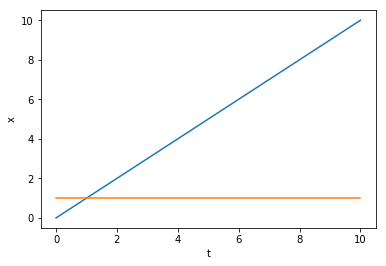

In [2]:
## Problem (a)

def E(t):
    return np.array([[-t, t*t], [-1, t]])
def A(t):
    return np.array([[-1, 0], [0, -1]])
def f(t):
    return np.array([0, 0])

def F(t, x, xdot):
    return E(t).dot(xdot) - A(t).dot(x) - f(t)

inival = np.array([0, 1])
interval = [0, 10]

sol = impliciteuler(F=F, inival=inival, interval=interval, Nts=500)

Caution at t=1.0: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


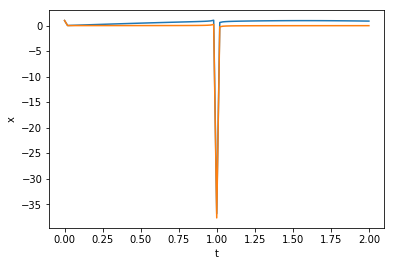

Caution at t=1.0: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Caution at t=1.02: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


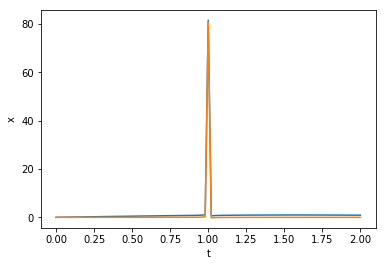

In [3]:
## Problem (b)

def E(t):
    return np.array([[0, 0], [1, -1]])
def A(t):
    return np.array([[-1, t], [0, 0]])
def f(t):
    return np.array([np.sin(t), np.cos(t)])

def F(t, x, xdot):
    return E(t).dot(xdot) - A(t).dot(x) - f(t)

interval = [0, 2]

inival = np.array([1, 1])
sol = impliciteuler(F=F, inival=inival, interval=interval, Nts=100)

inival = np.array([0, 0])
sol = impliciteuler(F=F, inival=inival, interval=interval, Nts=100)

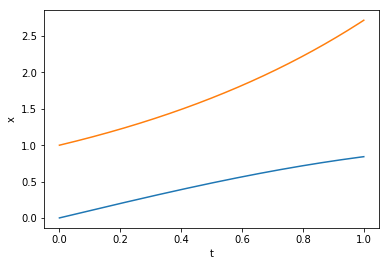

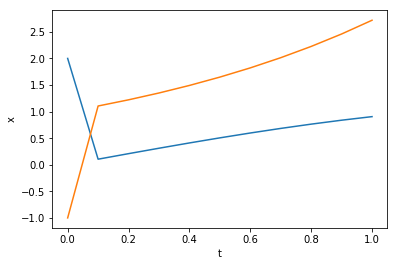

In [4]:
## Problem (c)

def E(t):
    return np.array([[1, 1], [0, 0]])
def A(t):
    return np.array([[0, 0], [0, -1]])
def f(t):
    return np.array([np.exp(t)+np.cos(t), np.exp(t)])

def F(t, x, xdot):
    return E(t).dot(xdot) - A(t).dot(x) - f(t)

interval = [0, 1]

inival = np.array([0, 1])
sol = impliciteuler(F=F, inival=inival, interval=interval, Nts=1000)

inival = np.array([2, -1])
sol = impliciteuler(F=F, inival=inival, interval=interval, Nts=10)